# THE NORMAL DISTRIBUTION

*Notes by Andres F.R.*

--------------

TODO:

* PDF and CDF for uni and multivariate
* Expected value and variance
* GMM
* KL divergence between 2 gaussians (from simple case to GMM multivar)

In [30]:
import torch
#import pyro
#import pgmpy
import matplotlib.pyplot as plt

#
%matplotlib notebook
from ipywidgets import interact, interactive # fixed, interact_manual
import ipywidgets as widgets


print("ok")

ok


--------------

# PDF

### Univariate:

$
\mathcal{N}(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$

Note that $(x-\mu)^2$ is the square of the **euclidean distance** from $\mu$ to x.

### Multivariate:

For $x,\, \mu \, \in \mathbb{R}^D, \quad S \, \in \mathbb{R}^{D\times D}$ (positive semidefinite).

$
\mathcal{N}(x; \mu, S) = \frac{1}{\sqrt{(2\pi)^D |S|}} e^{-\frac{(x-\mu)^T S^{-1} (x-\mu)}{2\sigma^2}}
$


Note that $(x-\mu)^T \Sigma^{-1} (x-\mu)$ is the square of the **Mahalanobis distance** from $\mu$ to x. If $\Sigma$ is the identity matrix, this equals the euclidean distance. Also, $|S|$ is the determinant of $S$.

# CDF

### Univariate:

Note that in this case $\Phi$ refers to any gaussian, not only the standard. Also note that there is no closed form for the integral, but there are [numerical approximations](https://en.wikipedia.org/wiki/Normal_distribution#Numerical_approximations_for_the_normal_CDF).

$
\Phi(a; \mu, \sigma) = P(\mathcal{N}(x; \mu, \sigma) \leq a) = \int_{-\infty}^{a} \mathcal{N}(x; \mu, \sigma) dx
$


## CCDF

Complementary CDF, also "tail distribution" or "excedance":

$
\bar{\Phi}(a; \mu, \sigma) = P(\mathcal{N}(x; \mu, \sigma) \geq a) = \int_{a}^{\infty} \mathcal{N}(x; \mu, \sigma) dx = 1 - \Phi(a; \mu, \sigma)
$


# EXPECTED VALUE

Note that for any PDF $f(x)$:

$
\mathbb{E}[f] = \int_{-\infty}^{\infty} x \cdot f(x) dx
$

### Univariate:


$$
\begin{align}
\mathbb{E}[\mathcal{N}(x; \mu, \sigma)] &= \int_{-\infty}^{\infty} x \cdot \mathcal{N}(x; \mu, \sigma) dx \\
   &= \int_{-\infty}^{\infty} x \cdot \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx\\
   &\text{we substitute }z := x-\mu \text{ (dz doesn't get affected by this transformation)}\\
   &= \int_{-\infty}^{\infty} (z+\mu) \cdot \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{z^2}{2\sigma^2}} dz \\
   &= \int_{-\infty}^{\infty} z \cdot \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{z^2}{2\sigma^2}} dz + \int_{-\infty}^{\infty} \mu \cdot \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{z^2}{2\sigma^2}} dz\\
   &\text{first integral has odd symmetry, thus vanishes}\\
   &= 0 + \mu \int_{-\infty}^{\infty} \cdot \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{z^2}{2\sigma^2}} dz \\
   &\text{Integral of a PDF (gaussian) is 1}\\
   &= 0 + \mu \cdot 1\\
   &= \mu
\end{align}
$$
$\square$

### Multivariate:

$$
\begin{align}
\mathbb{E}[\mathcal{N}(x; \mu, S)] &= \int_{-\infty}^{\infty} x \cdot \mathcal{N}(x; \mu, S) dx \\
   &= \int_{-\infty}^{\infty} x \cdot \frac{1}{\sqrt{(2\pi)^D |S|}} e^{-\frac{(x-\mu)^T S^{-1} (x-\mu)}{2\sigma^2}} dx\\
   &\text{we substitute }z := x-\mu\\
   &= \int_{-\infty}^{\infty} (z+\mu) \cdot \frac{1}{\sqrt{(2\pi)^D |S|}} e^{-\frac{z^T S^{-1} z}{2\sigma^2}}  dz \\
   &= \int_{-\infty}^{\infty} z \cdot \frac{1}{\sqrt{(2\pi)^D |S|}} e^{-\frac{z^T S^{-1} z}{2\sigma^2}}  dz + \int_{-\infty}^{\infty} \mu \cdot \frac{1}{\sqrt{(2\pi)^D |S|}} e^{-\frac{z^T S^{-1} z}{2\sigma^2}}  \\
   &\text{first integral has odd symmetry, thus vanishes}\\
   &= 0 + \mu \int_{-\infty}^{\infty} \cdot \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{z^2}{2\sigma^2}} dz \\
   &\text{Integral of a PDF (gaussian) is 1}\\
   &= 0 + \mu \cdot 1\\
   &= \mu
\end{align}
$$




# VARIANCE

Note that for any PDF $f(x)$:

$
Var(f) = \mathbb{E}[(f-\mathbb{E}[f])^2] = \int_{-\infty}^{\infty} (x - \mu)^2 \cdot f(x) dx
$

Where $\mu := \mathbb{E}[f]$.


Also note that $Var(f) = \mathbb{E}[f^2] - \mathbb{E}[f]^2$ (see proof below)



### Univariate:


$$
\begin{align}
Var(\mathcal{N}(x; \mu, \sigma)) &= \mathbb{E}[\mathcal{N}^2] - \mu^2 \\
   &= \int_{-\infty}^{\infty} x^2 \cdot \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx - \mu^2\\
   &= \frac{1}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{\infty} x^2  e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx - \mu^2\\
   &\text{we substitute }z := \frac{(x-\mu)}{\sqrt(2)\sigma} \text{  and therefore } x:=\sqrt{2}\sigma z + \mu, \; dx = \sqrt{2}\sigma dz \\
   &= \frac{\sqrt{2} \sigma}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{\infty} (\sqrt{2}\sigma z + \mu)^2  e^{-z^2} dz - \mu^2 \\
   &= \frac{1}{\sqrt{\pi}} \int_{-\infty}^{\infty} (\sqrt{2}\sigma z + \mu)^2  e^{-z^2} dz - \mu^2 \\
   &= \frac{1}{\sqrt{\pi}} \Bigg[ \int_{-\infty}^{\infty} 2\sigma^2 z^2 \cdot e^{-z^2} dz +  \int_{-\infty}^{\infty} 2\sqrt{2}\sigma z \mu \cdot  e^{-z^2} dz + \int_{-\infty}^{\infty} \mu^2 \cdot e^{-z^2} dz \Bigg] - \mu^2 \\
   &= \frac{1}{\sqrt{\pi}} \Bigg[ 2\sigma^2 \int_{-\infty}^{\infty}  z^2  e^{-z^2} dz + 2\sqrt{2}\sigma \mu \int_{-\infty}^{\infty}  z   e^{-z^2} dz + \mu^2 \int_{-\infty}^{\infty}  e^{-z^2} dz \Bigg] - \mu^2 \\
    &\text{Gaussian integral}\\
    &= \frac{1}{\sqrt{\pi}} \Bigg[ 2\sigma^2 \int_{-\infty}^{\infty}  z^2  e^{-z^2} dz + 2\sqrt{2}\sigma \mu \int_{-\infty}^{\infty}  z   e^{-z^2} dz + \mu^2 \sqrt{\pi} \Bigg] - \mu^2 \\
    &\text{mid integral has odd symmetry and vanishes}\\
    &= \frac{1}{\sqrt{\pi}} \Bigg[ 2\sigma^2 \int_{-\infty}^{\infty}  z^2  e^{-z^2} dz + 2\sqrt{2}\sigma \mu \cdot 0 + \mu^2 \sqrt{\pi} \Bigg] - \mu^2 \\
     &= \frac{1}{\sqrt{\pi}} \Bigg[ 2\sigma^2 \int_{-\infty}^{\infty}  z^2  e^{-z^2} dz \Bigg] + \mu^2 - \mu^2 \\
     &= \frac{2\sigma^2 }{\sqrt{\pi}} \int_{-\infty}^{\infty}  z^2  e^{-z^2} dz\\
     &\text{int. by parts: } u := z,\; v=ze^{-z^2}\\
         &= \frac{2\sigma^2 }{\sqrt{\pi}} \Bigg[ \, \Big| t \cdot \frac{-e^{-z^2}}{2} \Big|_{-\infty}^{\infty} - \int_{-\infty}^{\infty} 1 \cdot \frac{-e^{-z^2}}{2} dz \Bigg]\\
     &\text{First integral has odd symmetry and vanishes, second is Gaussian int.}\\
     &= \frac{2\sigma^2 }{\sqrt{\pi}} \frac{\sqrt{\pi}}{2} \; = \; \sigma^2\\
\end{align}
$$

### Multivariate:





--------------

# MISC PROOFS


### $Var(f) = \mathbb{E}[f^2] - \mathbb{E}[f]^2$

This holds because of the linearity of $\mathbb{E}$:

$$
\begin{align}
\mathbb{E}[(f-\mu)^2] &= \int_{-\infty}^{\infty} (x-\mu)^2 f(x) dx \\
   &= \int_{-\infty}^{\infty} x^2 f(x) dx + \mu^2 \int_{-\infty}^{\infty} f(x) dx - 2\mu \int_{-\infty}^{\infty} x f(x) dx \\
   &= \mathbb{E}[f^2] + \mu^2 \cdot 1 -2\mu \cdot \mathbb{E}[f]\\
   &= \mathbb{E}[f^2] + \mu^2 -2\mu^2 = \mathbb{E}[f^2] - \mu^2\\
\end{align}
$$
$\square$

--------------

In [87]:
PI = 3.14159265359

def gaussian_pdf_univariate(x, mu, sigma):
    """
    gaussian_pdf(torch.linspace(-1, 1, 9), 0, 1)
    """
    var = sigma ** 2
    factor = (2 * PI * var) ** -0.5
    dist = -0.5 * (((x - mu) / sigma) ** 2)
    return factor * torch.exp(dist)
    
class InteractivePlot():
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        
class TwoGaussians(InteractivePlot):
    def plot(self, mu1, sigma1, mu2, sigma2,
                      min_x=-10, max_x=10, resolution=100):
        """
        """
        x = torch.linspace(min_x, max_x, resolution)
        pdf1 = gaussian_pdf_univariate(x, mu1, sigma1)
        pdf2 = gaussian_pdf_univariate(x, mu2, sigma2)
        self.ax.clear()
        self.ax.fill_between(x.numpy(), pdf1.numpy(), color=(0,1,0,0.1))
        self.ax.fill_between(x.numpy(), pdf2.numpy(), color=(1,0,0,0.1))


<IPython.core.display.Javascript object>


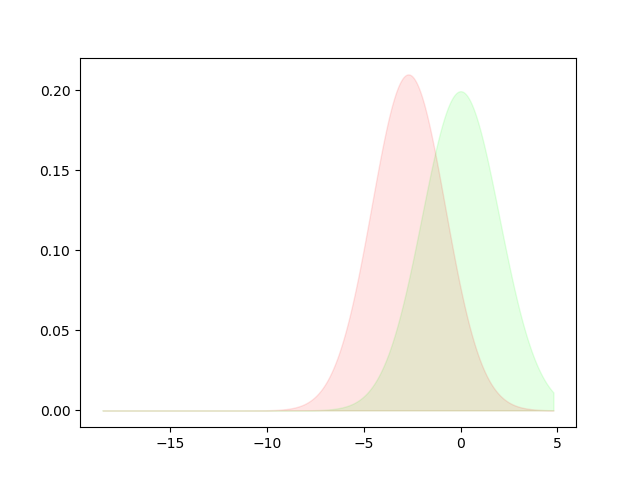

interactive(children=(FloatSlider(value=0.0, description='mu1', max=10.0, min=-10.0), FloatSlider(value=1.0, d…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [88]:
interact(TwoGaussians().plot,
         mu1=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
         mu2=widgets.FloatSlider(min=-10, max=10, step=0.1, value=1),
         sigma1=widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
         sigma2=widgets.FloatSlider(min=0, max=10, step=0.1, value=2),
         min_x=widgets.FloatSlider(min=-100, max=0, step=0.1, value=-50),
         max_x=widgets.FloatSlider(min=0, max=100, step=0.1, value=50),
         resolution=widgets.IntSlider(min=1, max=1000, step=1, value=500))

--------------

$\alpha=\beta$

--------------

$\alpha=\beta$

--------------

$\alpha=\beta$

In [5]:
test = 1
print(test)

1


--------------

$\alpha=\beta$

In [5]:
test = 1
print(test)

1


--------------